# Setup

In [1]:
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
import wandb
from utilities import *
from config import *
from dataloading import *
from tqdm import tqdm
from transformer import *
import os

Loading data...


In [12]:
print("Logging in...")
wandb.login()

Logging in...


True

In [14]:
# assumes you're using the transformer
# if you're using the MLP, you'll need to change the data pipeline and the final dimension
# also you can modify the transformer config in the transformer.py file

# setup the model
model = BigramLanguageModel()

# cuda? (gpu)
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

# send to gpu (maybe)
model = nn.DataParallel(model)
model = model.to(device)

# load the model
filename = PATH + "/model/" + MODELNAME + ".pth"
if os.path.isfile(filename):
    model.load_state_dict(torch.load(filename, map_location=torch.device(device)))
else:
   raise Exception("Model not found")

torch.set_grad_enabled(False)
print(model)

DataParallel(
  (module): BigramLanguageModel(
    (token_embedding_table): Embedding(16, 384)
    (position_embedding): Embedding(6, 384)
    (sa_heads): MultiHeadAttention(
      (heads): ModuleList(
        (0-5): 6 x Head(
          (key): Linear(in_features=384, out_features=64, bias=False)
          (query): Linear(in_features=384, out_features=64, bias=False)
          (value): Linear(in_features=384, out_features=64, bias=False)
          (dropout): Dropout(p=0, inplace=False)
        )
      )
      (proj): Linear(in_features=384, out_features=384, bias=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (blocks): Sequential(
      (0): Block(
        (sa): MultiHeadAttention(
          (heads): ModuleList(
            (0-5): 6 x Head(
              (key): Linear(in_features=384, out_features=64, bias=False)
              (query): Linear(in_features=384, out_features=64, bias=False)
              (value): Linear(in_features=384, out_features=64, bias=False)
          

# Manual experiments

In [15]:
model.module.token_embedding_table.weight

Parameter containing:
tensor([[ 7.6249e-03, -5.6712e-03, -3.6209e-03,  ...,  3.3624e-03,
          5.1007e-03,  3.5597e-03],
        [-1.7690e-02, -8.4979e-03,  3.4579e-03,  ...,  2.1522e-02,
          1.7206e-03, -1.2525e-02],
        [ 3.0772e-02, -1.8963e-02,  2.6690e-02,  ...,  6.4430e-04,
         -1.1060e-02,  3.0348e-02],
        ...,
        [ 2.6396e-02,  2.2285e-02, -2.9561e-02,  ...,  2.0200e-03,
          9.5690e-03,  2.6362e-02],
        [-1.5805e-02, -1.0714e-02,  5.5097e-04,  ..., -2.1106e-02,
         -1.0478e-03, -4.7837e-02],
        [-7.7841e-21, -2.2246e-20,  1.6643e-20,  ..., -6.9968e-21,
          1.1594e-20, -1.1670e-20]], requires_grad=True)

In [5]:
model.module.token_embedding_table(tensor(1))

tensor([-1.7690e-02, -8.4979e-03,  3.4579e-03, -1.2030e-02, -4.5630e-03,
         1.6772e-02, -1.1401e-03, -2.4811e-02,  2.4294e-03, -1.5215e-03,
        -2.6463e-02,  1.4341e-02,  1.9380e-02,  2.1810e-02,  3.0811e-02,
        -2.5504e-02, -6.5729e-03, -1.4511e-02, -8.4971e-03, -6.4994e-03,
         3.8891e-02, -2.0518e-02,  1.5704e-02,  3.2207e-02,  1.0527e-02,
         2.2127e-02,  2.1362e-02,  3.1056e-03, -1.1404e-02, -1.0937e-02,
        -3.5666e-03, -1.8669e-02, -9.4839e-03,  2.1300e-02,  3.7388e-02,
        -5.5442e-03,  3.8985e-03,  2.0471e-02,  5.0997e-03,  2.2179e-04,
        -1.9603e-03, -8.6986e-03,  3.5640e-02,  3.1239e-02,  2.1879e-03,
         3.1547e-02,  2.0152e-03, -1.5663e-02,  2.5843e-02, -1.3313e-03,
         6.2848e-03,  3.6273e-03, -9.9302e-03,  8.8632e-03,  7.2882e-03,
        -7.6892e-03, -3.0612e-02,  2.3584e-02,  1.7157e-02,  1.7905e-03,
        -1.2583e-02,  1.4755e-03, -2.1977e-02, -2.2982e-02, -6.8467e-03,
         3.4612e-03,  7.6310e-03,  1.6468e-02, -1.5

In [16]:
import plotly.express as px

In [17]:
px.imshow(model.module.token_embedding_table.weight)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': array([[ 7.62491720e-03, -5.67119475e-03, -3.62092652e-03, ...,
                            3.36237648e-03,  5.10071544e-03,  3.55974399e-03],
                          [-1.76902972e-02, -8.49785376e-03,  3.45794135e-03, ...,
                            2.15218272e-02,  1.72055920e-03, -1.25254672e-02],
                          [ 3.07722725e-02, -1.89629719e-02,  2.66901925e-02, ...,
                            6.44303800e-04, -1.10599352e-02,  3.03476732e-02],
                          ...,
                          [ 2.63958834e-02,  2.22851597e-02, -2.95612812e-02, ...,
                            2.01999815e-03,  9.56899300e-03,  2.63617951e-02],
                          [-1.58049185e-02, -1.07136630e-02,  5.50972123e-04, ...,
                           -2.11056955e-02, -1.04779727e-03, -4.78369072e-02],
                          [-7.78411530e-21, -2.22463634e-20,  1.66425492e-20, ...,
                           -6.99679122e-21,  1.15940155e-20, -1.16698875e-20]], dtype=float32)}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [91]:
embedding = np.array(model.module.token_embedding_table.weight.cpu().detach().numpy())
pos_embedding = np.array(model.module.position_embedding.weight.cpu().detach().numpy())

In [34]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(embedding)

embedding_pca = pca.transform(embedding)

In [95]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca.fit(pos_embedding)

pos_embedding_pca = pca.transform(pos_embedding)

In [41]:
np.linalg.norm(embedding_pca[1]-embedding_pca[4])

6.535973e-05

In [58]:
from collections import defaultdict as dd

epsilon = 0.1
mapping = dd(list)

for pos, x in enumerate(embedding_pca):
    found = False

    for y in mapping.keys():
        if np.linalg.norm(x-np.array(y)) < epsilon:
            mapping[y].append(pos)
            found = True
            break

    if not found:
        mapping[tuple(x)].append(pos)

mapping

defaultdict(list,
            {(0.0031818817, 0.0030397186, -0.002220441): [0, 5, 10, 15],
             (-0.13651949, -0.19699454, 0.12700911): [1, 4],
             (-0.23662229, 0.05565358, -0.13979506): [2, 8],
             (-0.083646074, 0.17710409, 0.19467598): [3, 12],
             (0.071046986, -0.17766689, -0.18456739): [6, 9],
             (0.2371524, -0.06320728, 0.13557744): [7, 13],
             (0.14291638, 0.20052744, -0.12913476): [11, 14]})

In [64]:
similarity = []

for x in embedding:
    row = []
    for y in embedding:
        row.append(np.dot(x, y))
    similarity.append(row)

px.imshow(similarity)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': array([[ 1.4324183e-02, -4.2446647e-03, -2.3853558e-03, ..., -2.4552937e-03,
                           -2.5692314e-03, -1.0857103e-21],
                          [-4.2446647e-03,  1.0947794e-01, -1.3267806e-02, ..., -2.0722773e-02,
                           -4.1638412e-02, -3.0687872e-21],
                          [-2.3853558e-03, -1.3267806e-02,  1.1349729e-01, ..., -4.4255681e-02,
                           -2.1675382e-02,  7.9621013e-21],
                          ...,
                          [-2.4552937e-03, -2.0722773e-02, -4.4255681e-02, ...,  1.1241428e-01,
                           -1.4416144e-02,  1.4972199e-21],
                          [-2.5692314e-03, -4.1638412e-02, -2.1675382e-02, ..., -1.4416144e-02,
                            1.0939083e-01, -5.2863287e-21],
                          [-1.0857103e-21, -3.0687872e-21,  7.9621013e-21, ...,  1.4972199e-21,
                           -5.2863287e-21,  7.6573091e-38]], dtype=float32)}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [111]:
test_input = torch.tensor([6, 11, 0, 6, 11, 0]).to(device)

In [119]:
test_input

tensor([ 6, 11,  0,  6, 11,  0])

In [138]:
tok_embeddings = model.module.token_embedding_table(test_input)
pos_embeddings = model.module.position_embedding(torch.arange(test_input.size()[0]).to(device))
total_embeddings = tok_embeddings + pos_embeddings

In [139]:
total_embeddings

tensor([[-0.0196,  0.0743, -0.0121,  ..., -0.0071, -0.0237,  0.0023],
        [-0.0337, -0.0452, -0.0045,  ..., -0.0521, -0.0092, -0.0555],
        [ 0.0359,  0.0110,  0.0069,  ...,  0.0429, -0.0227, -0.0126],
        [-0.0556,  0.0393,  0.0353,  ..., -0.0414,  0.0119, -0.0456],
        [ 0.0043, -0.0136, -0.0541,  ..., -0.0181, -0.0479, -0.0052],
        [ 0.0343, -0.0560,  0.0268,  ...,  0.0050,  0.0501,  0.0349]])

In [142]:
total_similarity = []
for x in total_embeddings:
    row = []
    for y in total_embeddings:
        row.append(np.dot(x, y))
    total_similarity.append(row)

px.imshow(total_similarity)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': array([[ 0.42351913, -0.24697673, -0.01833273,  0.10233387,  0.05748856,
                           -0.16209044],
                          [-0.24697673,  0.44029722, -0.1861577 ,  0.09808721,  0.1095506 ,
                            0.0062122 ],
                          [-0.01833273, -0.1861577 ,  0.32277837, -0.18701234, -0.01718005,
                            0.01988177],
                          [ 0.10233387,  0.09808721, -0.18701234,  0.43856537, -0.2514923 ,
                            0.00931355],
                          [ 0.05748856,  0.1095506 , -0.01718005, -0.2514923 ,  0.43326786,
                           -0.1662385 ],
                          [-0.16209044,  0.0062122 ,  0.01988177,  0.00931355, -0.1662385 ,
                            0.3580314 ]], dtype=float32)}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [141]:
pos_similarity = []

for x in pos_embedding:
    row = []
    for y in pos_embedding:
        row.append(np.dot(x, y))
    pos_similarity.append(row)

px.imshow(pos_similarity)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': array([[ 0.32028478, -0.23604092, -0.00260209, -0.00704974,  0.07600221,
                           -0.14396809],
                          [-0.23604092,  0.3197577 , -0.17684409,  0.10351582, -0.00627759,
                            0.01207775],
                          [-0.00260209, -0.17684409,  0.33899966, -0.17995173,  0.00091429,
                           -0.01437159],
                          [-0.00704974,  0.10351582, -0.17995173,  0.32303253, -0.23848583,
                            0.01876589],
                          [ 0.07600221, -0.00627759,  0.00091429, -0.23848583,  0.322151  ,
                           -0.15159218],
                          [-0.14396809,  0.01207775, -0.01437159,  0.01876589, -0.15159218,
                            0.27330345]], dtype=float32)}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [152]:
# was here
model.module.sa_heads(total_embeddings)

ValueError: not enough values to unpack (expected 3, got 2)

In [76]:
convert_to_transposition(8)

(2, 0)

In [78]:
convert_from_transposition(1, 2)

6

In [81]:
def is_trivial(trans):
    return trans[0] == trans[1]

In [88]:
epsilon = -0.03

for pos1, row in enumerate(similarity):
    for pos2, value in enumerate(row[:pos1]):
        if value < epsilon and pos1 != pos2:
            trans1 = convert_to_transposition(pos1)
            trans2 = convert_to_transposition(pos2)
            
            if not is_trivial(trans1) and not is_trivial(trans2):
                print(trans1, trans2)

(1, 2) (0, 3)
(1, 3) (0, 2)
(2, 0) (1, 3)
(2, 1) (0, 3)
(2, 3) (0, 1)
(2, 3) (1, 0)
(3, 0) (1, 2)
(3, 0) (2, 1)
(3, 1) (0, 2)
(3, 1) (2, 0)
(3, 2) (0, 1)
(3, 2) (1, 0)


In [30]:
import pyperclip

def np_to_mathematica(array, copy=True):
    formatted = str(array.tolist()).replace("[", "{").replace("]", "}")
    return formatted

In [96]:
pyperclip.copy(np_to_mathematica(pos_embedding_pca))
print("Copied!")

Copied!


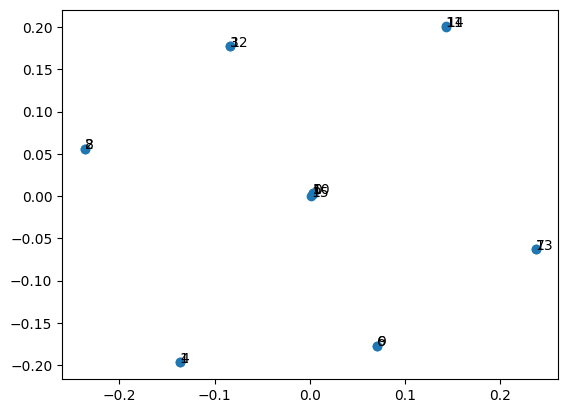

In [23]:
# plot the PCA using matplotlib
import matplotlib.pyplot as plt
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1])

# add the word labels to the plot
for i, word in enumerate(range(vocab_size)):
    plt.annotate(word, xy=(embedding_pca[i, 0], embedding_pca[i, 1]))

plt.show()

# Transformer Lens

In [5]:
import circuitsvis as cv
# Testing that the library works
cv.examples.hello("World")

In [6]:
import einops
from fancy_einsum import einsum
import tqdm.auto as tqdm
import plotly.express as px

from jaxtyping import Float
from functools import partial

In [14]:
# import transformer_lens
import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookPoint,
)  # Hooking utilities
from transformer_lens import HookedTransformer, FactoredMatrix, HookedTransformerConfig

In [8]:
torch.set_grad_enabled(False)

In [15]:
def imshow(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
    px.imshow(utils.to_numpy(tensor), color_continuous_midpoint=0.0, color_continuous_scale="RdBu", labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

def line(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
    px.line(utils.to_numpy(tensor), labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

def scatter(x, y, xaxis="", yaxis="", caxis="", renderer=None, **kwargs):
    x = utils.to_numpy(x)
    y = utils.to_numpy(y)
    px.scatter(y=y, x=x, labels={"x":xaxis, "y":yaxis, "color":caxis}, **kwargs).show(renderer)

In [54]:
from collections import OrderedDict
import re

# have to convert the state dict to the HookedTransformer format
def translate(key, value):
    direct_swaps = {
        "module.token_embedding_table.weight": "embed.W_E",
        "module.position_embedding.weight": "pos_embed.W_pos",
        "module.lm_head.weight": "unembed.W_U",
        "module.lm_head.bias": "unembed.b_U",
    }

    key = direct_swaps[key] if key in direct_swaps.keys() else key

    # need to reshape the unembedding matrix
    if key == "unembed.W_U":
        value = value.reshape(-1, 1)

    # attention heads
    matches = re.match(r"/module\.sa_heads\.heads\.(\d)\.(.+)", key)
    if matches:
        block = matches.group(1)
        subkey = matches.group(2)

        subkey_swaps = {
            "key.weight": "W_K",
            "query.weight": "W_Q",
            "value.weight": "W_V",
            
        }

    return (key, value)

state_dict = torch.load(filename, map_location=torch.device(device))
state_dict.keys()
state_dict = OrderedDict(translate(k, v) for k, v in state_dict.items())
state_dict.keys()

0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
5
5
5


odict_keys(['embed.W_E', 'pos_embed.W_pos', 'module.sa_heads.heads.0.key.weight', 'module.sa_heads.heads.0.query.weight', 'module.sa_heads.heads.0.value.weight', 'module.sa_heads.heads.1.key.weight', 'module.sa_heads.heads.1.query.weight', 'module.sa_heads.heads.1.value.weight', 'module.sa_heads.heads.2.key.weight', 'module.sa_heads.heads.2.query.weight', 'module.sa_heads.heads.2.value.weight', 'module.sa_heads.heads.3.key.weight', 'module.sa_heads.heads.3.query.weight', 'module.sa_heads.heads.3.value.weight', 'module.sa_heads.heads.4.key.weight', 'module.sa_heads.heads.4.query.weight', 'module.sa_heads.heads.4.value.weight', 'module.sa_heads.heads.5.key.weight', 'module.sa_heads.heads.5.query.weight', 'module.sa_heads.heads.5.value.weight', 'module.sa_heads.proj.weight', 'module.sa_heads.proj.bias', 'module.blocks.0.sa.heads.0.key.weight', 'module.blocks.0.sa.heads.0.query.weight', 'module.blocks.0.sa.heads.0.value.weight', 'module.blocks.0.sa.heads.1.key.weight', 'module.blocks.0.sa.

In [47]:
state_dict["unembed.W_U"].shape

torch.Size([384, 1])

In [48]:
cfg = HookedTransformerConfig(
    n_layers=n_blocks,
    d_model=n_embed,
    d_head=n_embed // n_head,
    n_ctx=MAX_LENGTH,
    act_fn="relu",
    d_vocab=vocab_size,
    d_vocab_out=1,
)

hooked = HookedTransformer(cfg)

hooked.load_and_process_state_dict(state_dict)

wowza torch.Size([384, 1]) 



In [16]:
logits, cache = model.run_with_cache([12,4,1,8,7,0])

AttributeError: 'DataParallel' object has no attribute 'run_with_cache'